# GenericSwingGraphics Easy-Mode Test
To build the required artifact(s), run the following command from the folder `GenericSwingGraphics`:
```
$ ../gradlew clean build [--parallel]
```
Then the following cell would work as expected.

In [1]:
%classpath add jar "../GenericSwingGraphics/build/libs/GenericSwingGraphics-1.0.jar"

In [2]:
import gsg.SwingUtils.*;
import gsg.VectorUtils;
import static gsg.VectorUtils.Vector2D;

import java.awt.Color;
import java.awt.Dimension;
import java.awt.Font;
import java.awt.Point;

import java.util.stream.Collectors;

In [3]:
// Environment
String.format("Running from folder %s", System.getProperty("user.dir"));

Running from folder /Users/olivierlediouris/repos/MathForProgrammersForked/Chapter 02

In [4]:
// Environment
String.format("Java version %s", System.getProperty("java.version"));

Java version 11.0.8

### Create the WhiteBoard
See in the cells below, how we mostly focus on the data.

The rendering is taken care of by the `WhiteBoardPanel`. All we need to call to display it is `whiteBoard.getImage();`

In [5]:
WhiteBoardPanel whiteBoard = new WhiteBoardPanel();
// Override defaults (not mandatory)
whiteBoard.setAxisColor(new Color(125, 0, 255, 255));
whiteBoard.setWithGrid(true);
whiteBoard.setBgColor(new Color(250, 250, 250, 255));
whiteBoard.setGraphicTitle("121 Dinos");
whiteBoard.setDimension(new Dimension(800, 590));
whiteBoard.setTextColor(Color.RED);
whiteBoard.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 48));
whiteBoard.setGraphicMargins(30);

### Now, the data

In [6]:
List<Vector2D> dinoVectors = Arrays.asList( // A dinosaure
                new Vector2D(6, 4),
                new Vector2D(3, 1),
                new Vector2D(1, 2),
                new Vector2D(-1, 5),
                new Vector2D(-2, 5),
                new Vector2D(-3, 4),
                new Vector2D(-4, 4),
                new Vector2D(-5, 3),
                new Vector2D(-5, 2),
                new Vector2D(-2, 2),
                new Vector2D(-5, 1),
                new Vector2D(-4, 0),
                new Vector2D(-2, 1),
                new Vector2D(-1, 0),
                new Vector2D(0, -3),
                new Vector2D(-1, -4),
                new Vector2D(1, -4),
                new Vector2D(2, -3),
                new Vector2D(1, -2),
                new Vector2D(3, -1),
                new Vector2D(5, 1));

### A First display
Scaled and translated several times, 121 dinosaures!

One Unit: 49.028677
12 vertical ticks, 16 horizontal ticks.
tickIncrement: 1
Working Rectangle: x:30, y:40, w:539, h:530


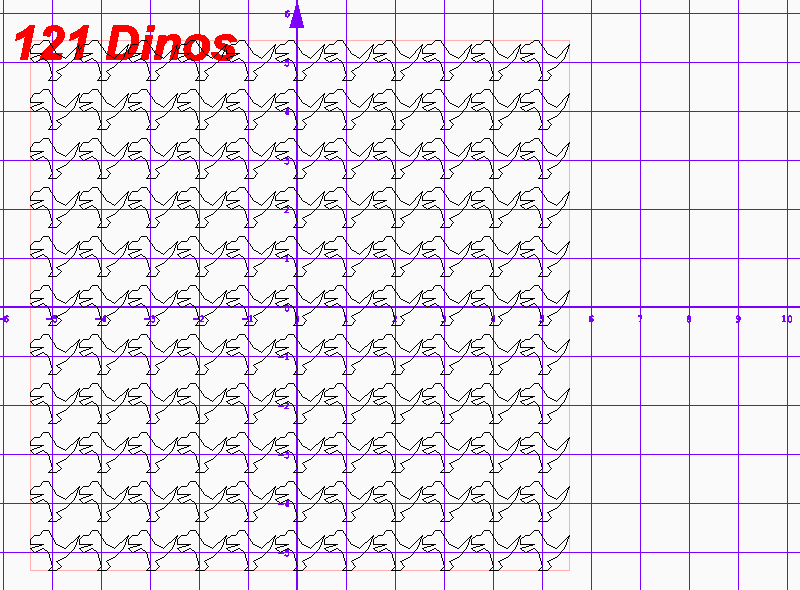

In [7]:
double scale = 0.09;
List<Vector2D> scaled = dinoVectors.stream().map(v -> VectorUtils.scale(scale, v)).collect(Collectors.toList());
for (int x=-5; x<=5; x++) {
    for (int y=-5; y<=5; y++) {
        Vector2D translation = new Vector2D(x, y);
        List<Vector2D> oneSmallDino = scaled.stream().map(v -> VectorUtils.translate(translation, v)).collect(Collectors.toList());
        WhiteBoardPanel.DataSerie serie100 = new WhiteBoardPanel.DataSerie()
                .data(oneSmallDino)
                .graphicType(WhiteBoardPanel.GraphicType.CLOSED_LINE)
                .lineThickness(1)
                .color(Color.BLACK);
        whiteBoard.addSerie(serie100);
    }
}
// Display here
whiteBoard.getImage();

### Another display, on the same white board

In [8]:
whiteBoard.setGraphicTitle("A full test");
whiteBoard.resetAllData();

In [9]:
// Dino, raw, scale 1
WhiteBoardPanel.DataSerie serieOne = new WhiteBoardPanel.DataSerie()
        .data(dinoVectors)
        .graphicType(WhiteBoardPanel.GraphicType.CLOSED_LINE_WITH_DOTS)
        .circleDiam(8)
        .lineThickness(2)
        .color(Color.BLUE);
whiteBoard.addSerie(serieOne);

// Dino, rotated
double rotation = -30d;
List<Vector2D> rotated = dinoVectors.stream().map(v -> VectorUtils.rotate(Math.toRadians(rotation), v)).collect(Collectors.toList());
WhiteBoardPanel.DataSerie serieTwo = new WhiteBoardPanel.DataSerie()
        .data(rotated)
        .graphicType(WhiteBoardPanel.GraphicType.CLOSED_LINE)
        .circleDiam(2)
        .lineThickness(3)
        .color(Color.RED);
whiteBoard.addSerie(serieTwo);

// Dino, scaled
double scale = 0.25;
List<Vector2D> scaled = dinoVectors.stream().map(v -> VectorUtils.scale(scale, v)).collect(Collectors.toList());
WhiteBoardPanel.DataSerie serieThree = new WhiteBoardPanel.DataSerie()
        .data(scaled)
        .graphicType(WhiteBoardPanel.GraphicType.CLOSED_LINE)
        .circleDiam(2)
        .lineThickness(3)
        .color(Color.GREEN);
whiteBoard.addSerie(serieThree);

// Dino, scaled & translated
Vector2D translation = new Vector2D(3, 2);
List<Vector2D> translated = scaled.stream().map(v -> VectorUtils.translate(translation, v)).collect(Collectors.toList());
WhiteBoardPanel.DataSerie serieThreeBis = new WhiteBoardPanel.DataSerie()
        .data(translated)
        .graphicType(WhiteBoardPanel.GraphicType.CLOSED_LINE)
        .circleDiam(2)
        .lineThickness(3)
        .color(Color.GREEN);
whiteBoard.addSerie(serieThreeBis);

// A Polynomial function
List<Vector2D> polynom = new ArrayList<>();
for (double i = -6; i <= 15; i += 0.25) {
    polynom.add(new Vector2D(i,
            (0.01 * Math.pow(i, 3)) - (0.1 * Math.pow(i, 2)) - (0.2 * i) + 3));
}
WhiteBoardPanel.DataSerie serieFour = new WhiteBoardPanel.DataSerie()
        .data(polynom)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .circleDiam(2)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoard.addSerie(serieFour);

// Cloud of points
List<Vector2D> cloud = new ArrayList<>();
for (int i = 0; i < 200; i++) {
    // x & y in [-10, 10[
    cloud.add(new Vector2D((Math.random() * 20) - 10,
            (Math.random() * 20) - 10));
}
WhiteBoardPanel.DataSerie serieFive = new WhiteBoardPanel.DataSerie()
        .data(cloud)
        .graphicType(WhiteBoardPanel.GraphicType.POINTS)
        .circleDiam(18)
        .color(new Color(255, 0, 0, 126));
whiteBoard.addSerie(serieFive);

Final display

One Unit: 24.941325
24 vertical ticks, 32 horizontal ticks.
tickIncrement: 1
Working Rectangle: x:30, y:40, w:623, h:530


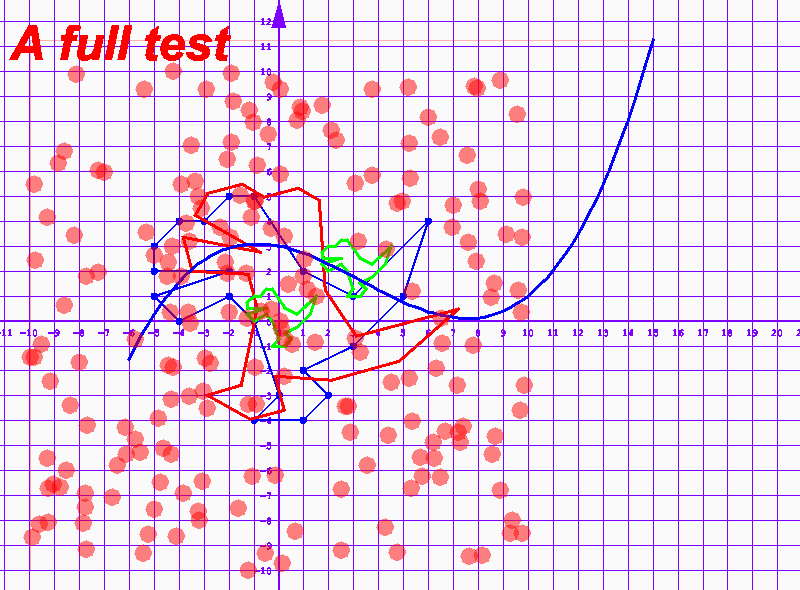

In [10]:
whiteBoard.getImage(); // This is for a Notebook

There you go!